# Procedimiento ETL 2 - ETL Ratings jupyter, Produccion de df_merge

In [1]:
import pandas as pd


lista_csvs = [1, 2, 3, 4, 5, 6, 7, 8]

dfs = []

for element in lista_csvs:
    df_merged_rating_score = pd.read_csv(f"./Data/ratings/{element}.csv") # Lee el archivo CSV correspondiente
    dfs.append(df_merged_rating_score) # Agrega el dataframe a una lista de dataframes

result = pd.concat(dfs, ignore_index=True) # Concatena todos los dataframes en uno solo, ignorando los índices originales


# Guardar el dataframe como un archivo CSV
df_merged_rating_score.to_csv("./Data/ratings/csv_maestro.csv", mode='a', header=True, index=False)


In [2]:
df_merged_rating_score
df_merged_rating_score = df_merged_rating_score
df_merged_rating_score

,userId,rating,timestamp,movieId
0,108422,4.5,1350689762,as1399
1,108422,4.0,1350341401,as6724
2,108422,5.0,1350689691,ns512
3,108422,4.5,1350341088,ns7444
4,108422,4.5,1350689619,as2230
...,...,...,...,...
1499995,124380,4.5,1196786159,ns5272
1499996,124380,2.5,1196786030,ns5492
1499997,124380,3.5,1196785679,hs305
1499998,124380,4.5,1196787089,ns7881


__________________________________________________________________________________________________________________________________________________________

___________________________________________________________________________________________________________

_____________________________________________________________________________________________________________________________________________________________

# Analisis : Perspectiva x <span style='color:yellow'>userId</span>:

In [3]:
df_merged_rating_score

,userId,rating,timestamp,movieId
0,108422,4.5,1350689762,as1399
1,108422,4.0,1350341401,as6724
2,108422,5.0,1350689691,ns512
3,108422,4.5,1350341088,ns7444
4,108422,4.5,1350689619,as2230
...,...,...,...,...
1499995,124380,4.5,1196786159,ns5272
1499996,124380,2.5,1196786030,ns5492
1499997,124380,3.5,1196785679,hs305
1499998,124380,4.5,1196787089,ns7881


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# agrupar por userId y obtener las películas vistas y sus votaciones
df_user_type = df_merged_rating_score.groupby('userId').agg({'movieId': list, 'rating': list})


df_user_type['cant_votaciones'] = df_merged_rating_score['userId'].value_counts()

# calcular la media de votaciones de cada usuario
df_user_type['media_votaciones'] = df_merged_rating_score.groupby('userId')['rating'].mean()

# calcular la distancia de cada votación a la media del usuario
df_user_type['distancia_media'] = df_merged_rating_score.groupby('userId')['rating'].apply(lambda x: abs(x - x.mean()).mean())
df_user_type['user_score'] = (df_user_type['cant_votaciones'] * df_user_type['media_votaciones'] * df_user_type['distancia_media'])

# Normalizar la columna 'user_score'
min_score = df_user_type['user_score'].min()
max_score = df_user_type['user_score'].max()
df_user_type['user_score'] = (df_user_type['user_score'] - min_score) / (max_score - min_score)

# mover la columna userId a la primera posición
df_user_type = df_user_type.reset_index()

# filtrar info ya innesesaria
df_user_type = df_user_type[['userId','user_score']]

df_user_type.head(10)

,userId,user_score
0,108422,0.005452
1,108423,0.266792
2,108424,0.000956
3,108425,0.001006
4,108426,0.059198
5,108427,0.006352
6,108428,0.000778
7,108429,0.004337
8,108430,0.001832
9,108431,0.004258


In [5]:
df_user_type.isnull().sum()


userId        0
user_score    0
dtype: int64

In [6]:
df_user_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15959 entries, 0 to 15958
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   userId      15959 non-null  int64  
 1   user_score  15959 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 249.5 KB


In [7]:
df_user_type.describe()

,userId,user_score
count,15959.000000,15959.000000
mean,116401.000000,0.020096
std,4607.110808,0.040790
min,108422.000000,0.000000
25%,112411.500000,0.002873
50%,116401.000000,0.006613
75%,120390.500000,0.020068
max,124380.000000,1.000000


In [8]:
merged_df2 = pd.merge(df_user_type, df_merged_rating_score, on='userId')
merged_df2['rating_valorizado_user'] = merged_df2['rating'] * (1 + merged_df2['user_score']) 
merged_df2.drop(columns=['rating'], inplace=True)
merged_df2.drop(columns=['user_score'], inplace=True)
merged_df2

,userId,timestamp,movieId,rating_valorizado_user
0,108422,1350689762,as1399,4.524534
1,108422,1350341401,as6724,4.021808
2,108422,1350689691,ns512,5.027260
3,108422,1350341088,ns7444,4.524534
4,108422,1350689619,as2230,4.524534
...,...,...,...,...
1499995,124380,1196786159,ns5272,4.545441
1499996,124380,1196786030,ns5492,2.525245
1499997,124380,1196785679,hs305,3.535343
1499998,124380,1196787089,ns7881,4.545441


# Analisis : Perspectiva x <span style='color:green'>movieId</span>:

In [9]:

# Agrupar los datos por "movieId" y calcular las estadísticas
grouped = merged_df2.groupby('movieId', as_index=False).agg({
    'rating_valorizado_user': ['mean', 'count'],
})

# Renombrar las columnas para que sean más descriptivas
grouped.columns = ['movieId', 'mean_rating_valorizado_user', 'vote_count']

# Calcular el puntaje de cada película
grouped['rating_movie_user'] = (grouped['mean_rating_valorizado_user'] * grouped['vote_count']) 
grouped['rating_movie_user'] = grouped['rating_movie_user'].fillna(0)

# Normalizar la columna 'movie_score'
min_score = grouped['rating_movie_user'].min()
max_score = grouped['rating_movie_user'].max()
grouped['rating_movie_user'] = ((grouped['rating_movie_user'] - min_score) / (max_score - min_score))

# Imprimir los resultados
evolution_rating = grouped[['movieId','rating_movie_user']]
evolution_rating



,movieId,rating_movie_user
0,as1,0.477569
1,as10,0.350204
2,as100,0.432320
3,as1000,0.481329
4,as1001,0.468519
...,...,...
22993,ns995,0.402465
22994,ns996,0.522230
22995,ns997,0.407648
22996,ns998,0.553696


# hasta aca revise!
# ________________________________________________________________________________________________

### Falta crear matriz con base de datos peligulas x desglose en categoria mulltiplicado ese 1 de categoria x la valorizacion rating_movie_user

In [10]:
df_movies = pd.read_csv(f"./Data/Base_de_datos_aws_dp_hulu_netflix.csv") # Lee el archivo CSV correspondiente


In [11]:
df_movies.head(50)

,id,plataforma,type,title,director,cast,country,date_added,release_year,rating,duration_int,duration_type,listed_in,description
0,as1,aws,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113,min,"comedy, drama",a small fishing village must procure a local d...
1,as2,aws,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,110,min,"drama, international",a metro family decides to fight a cyber crimin...
2,as3,aws,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,74,min,"action, drama, suspense",after a man discovers his wife is cheating on ...
3,as4,aws,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,69,min,documentary,"pink breaks the mold once again, bringing her ..."
4,as5,aws,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2021-03-30,1989,g,45,min,"drama, fantasy",teenage matt banting wants to work with a famo...
5,as6,aws,movie,living with dinosaurs,paul weiland,"gregory chisholm, juliet stevenson, brian hens...",united kingdom,2021-03-30,1989,g,52,min,"fantasy, kids",the story unfolds in a an english seaside town...
6,as7,aws,movie,hired gun,fran strine,"alice cooper, liberty devitto, ray parker jr.,...",united states,2021-03-30,2017,g,98,min,"documentary, special interest","they are the ""first call, a-list"" musicians, j..."
7,as8,aws,movie,grease live!,"thomas kail, alex rudzinski","julianne hough, aaron tveit, vanessa hudgens, ...",united states,2021-03-30,2016,g,131,min,comedy,"this honest, uncompromising comedy chronicles ..."
8,as9,aws,movie,global meltdown,daniel gilboy,"michael paré, leanne khol young, patrick j. ma...",canada,2021-03-30,2017,g,87,min,"action, science fiction, suspense",a helicopter pilot and an environmental scient...
9,as10,aws,movie,david's mother,robert allan ackerman,"kirstie alley, sam waterston, stockard channing",united states,2021-04-01,1994,g,92,min,drama,sally goodson is a devoted mother to her autis...


In [12]:
evolution_rating = evolution_rating.rename(columns={'movieId': 'id'})


merged_df = df_movies.merge(evolution_rating, on='id')

merged_df

,id,plataforma,type,title,director,cast,country,date_added,release_year,rating,duration_int,duration_type,listed_in,description,rating_movie_user
0,as1,aws,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113,min,"comedy, drama",a small fishing village must procure a local d...,0.477569
1,as1,disney plus,movie,duck the halls: a mickey mouse christmas special,"alonso ramirez ramos, dave wasson","chris diamantopoulos, tony anselmo, tress macn...",unknown,2021-11-26,2016,tv-g,23,min,"animation, family",join mickey and the gang as they duck the halls!,0.477569
2,as2,aws,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,110,min,"drama, international",a metro family decides to fight a cyber crimin...,0.388046
3,as2,disney plus,movie,ernest saves christmas,john cherry,"jim varney, noelle parker, douglas seale",unknown,2021-11-26,1988,pg,91,min,comedy,santa claus passes his magic bag to a new st. ...,0.388046
4,as3,aws,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,74,min,"action, drama, suspense",after a man discovers his wife is cheating on ...,0.393470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11113,as9664,aws,movie,pride of the bowery,joseph h. lewis,"leo gorcey, bobby jordan",unknown,2021-07-14,1940,7+,60,min,comedy,new york city street principles get an east si...,0.645091
11114,as9665,aws,tv show,planet patrol,unknown,"dick vosburgh, ronnie stevens, libby morris, m...",unknown,2021-07-14,2018,13+,4,seasons,tv shows,"this is earth, 2100ad - and these are the adve...",0.132569
11115,as9666,aws,movie,outpost,steve barker,"ray stevenson, julian wadham, richard brake, m...",unknown,2021-07-14,2008,r,90,min,action,"in war-torn eastern europe, a world-weary grou...",0.461561
11116,as9667,aws,tv show,maradona: blessed dream,unknown,"esteban recagno, ezequiel stremiz, luciano vit...",unknown,2021-07-14,2021,tv-ma,1,season,"drama, sports","the series tells the story of diego maradona, ...",0.509165


<Axes: xlabel='categories', ylabel='id'>

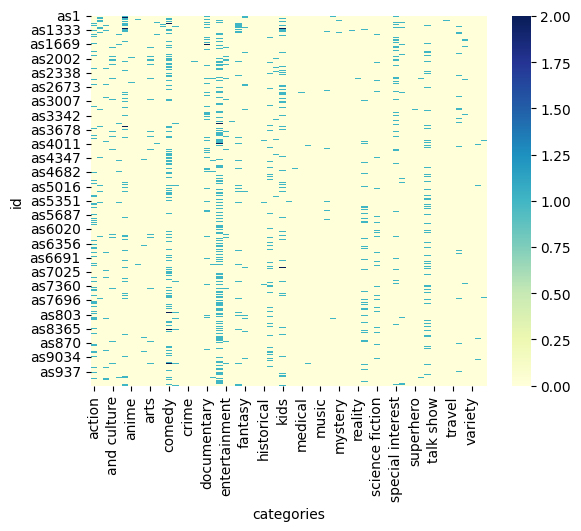

In [13]:
import pandas as pd
import seaborn as sns

# Step 1: Split the 'listed_in' column by commas
merged_df['categories'] = merged_df['listed_in'].str.split(', ')

# Step 2: Create a new dataframe with each movie-category pair
movie_categories = merged_df.explode('categories')[['id', 'categories']]

# Step 3: Use pivot_table to aggregate the frequency of each category for each movie
category_counts = pd.pivot_table(movie_categories, 
                                 index='id', 
                                 columns='categories', 
                                 aggfunc=len, 
                                 fill_value=0)

# Step 4: Create a heatmap of the category frequencies
sns.heatmap(category_counts, cmap='YlGnBu')


In [14]:
# Paso 1: Obtener una lista de todos los tópicos diferentes en la columna 'listed_in'
topics = set()
for category_list in merged_df['listed_in']:
    for category in category_list.split(', '):
        topics.add(category)
topics = list(topics)

# Paso 2: Crear una columna nueva en el dataframe 'merged_df' para cada tópico diferente
for topic in topics:
    merged_df[topic] = 0

# Paso 3: Establecer los valores de estas columnas en función de si el tópico correspondiente está presente en la columna 'listed_in' para esa película
for index, row in merged_df.iterrows():
    categories = row['listed_in'].split(', ')
    for category in categories:
        merged_df.at[index, category] = 1 * row['rating_movie_user']


In [15]:
merged_df.head(5)

,id,plataforma,type,title,director,cast,country,date_added,release_year,rating,...,buddy,superhero,unscripted,soap opera / melodrama,and culture,docuseries,horror,anime,lifestyle,lgbtq
0,as1,aws,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,as1,disney plus,movie,duck the halls: a mickey mouse christmas special,"alonso ramirez ramos, dave wasson","chris diamantopoulos, tony anselmo, tress macn...",unknown,2021-11-26,2016,tv-g,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,as2,aws,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,as2,disney plus,movie,ernest saves christmas,john cherry,"jim varney, noelle parker, douglas seale",unknown,2021-11-26,1988,pg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,as3,aws,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
print(df_movies.columns)
print(evolution_rating.columns)
print(merged_df.columns)


Index(['id', 'plataforma', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration_int', 'duration_type',
       'listed_in', 'description'],
      dtype='object')
Index(['id', 'rating_movie_user'], dtype='object')
Index(['id', 'plataforma', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration_int', 'duration_type',
       'listed_in', 'description', 'rating_movie_user', 'categories',
       'documentary', 'reality', 'music', 'western', 'kids',
       'action-adventure', 'arts', 'comedy', 'variety', 'fantasy', 'travel',
       'romance', 'parody', 'game show / competition', 'medical',
       'special interest', 'animals & nature', 'spy/espionage', 'talk show',
       'series', 'romantic comedy', 'dance', 'historical', 'action',
       'young adult audience', 'thriller', 'arthouse', 'mystery',
       'international', 'coming of age', 'tv shows', 'crime', 'disaster',
       'family', 'fit

In [17]:
merged_df = merged_df.sort_values(by='rating_movie_user', ascending=False)

merged_df.head(10)

,id,plataforma,type,title,director,cast,country,date_added,release_year,rating,...,buddy,superhero,unscripted,soap opera / melodrama,and culture,docuseries,horror,anime,lifestyle,lgbtq
3900,as2451,aws,tv show,fluffy's food adventures,unknown,"gabriel iglesias, rick gutierrez, martin moreno",unknown,2021-07-14,2017,tv-14,...,0.0,0.0,0.970207,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
6448,as4999,aws,movie,lionheart,sheldon lettich,"jean claude van damme, ashley johnson, brian t...",unknown,2021-07-14,1991,r,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9093,as7644,aws,movie,born kicking,mandie fletcher,"eve barker, denis lawson",unknown,2021-07-14,1992,13+,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
337,as169,disney plus,movie,we bought a zoo,cameron crowe,"matt damon, scarlett johansson, thomas haden c...",united states,2021-07-16,2011,pg,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
336,as169,aws,movie,wait for your laugh,jason wise,"rose marie, carl reiner, dick van dyke, dan ha...",unknown,2021-07-14,2018,13+,...,0.0,0.0,0.000000,0.0,0.943795,0.0,0.0,0.0,0.0,0.0
3305,as1856,aws,tv show,lights out!,unknown,unknown,unknown,2021-07-14,2012,tv-pg,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
10946,as9497,aws,movie,legend of a warrior,corey lee,"frank lee, corey lee",unknown,2021-07-14,2012,13+,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9740,as8291,aws,movie,milner,john strickland,"mel smith, deborah findlay",unknown,2021-07-14,1994,16+,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
5546,as4097,aws,tv show,foresighted liu bo wen,unknown,"huang shao qi, huo zheng qi",unknown,2021-07-14,2021,16+,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
7336,as5887,aws,movie,fanboys,kyle newman,"dan fogler, kristen bell, chris marquette, jay...",unknown,2021-07-14,2021,pg-13,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [18]:
# merged_df = merged_df.astype({
#     "id": "object",
#     "plataforma": "object",
#     "type": "category",
#     "title": "object",
#     "director": "object",
#     "cast": "object",
#     "country": "object",
#     "date_added": "datetime64[ns]",
#     "release_year": "int64",
#     "rating": "category",
#     "duration_int": "int64",
#     "duration_type": "category",
#     "listed_in": "object",
#     "description": "object",
#     "rating_movie_user": "float64"
# })


In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11118 entries, 3900 to 1313
Data columns (total 79 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         11118 non-null  object 
 1   plataforma                 11118 non-null  object 
 2   type                       11118 non-null  object 
 3   title                      11118 non-null  object 
 4   director                   11118 non-null  object 
 5   cast                       11118 non-null  object 
 6   country                    11118 non-null  object 
 7   date_added                 11118 non-null  object 
 8   release_year               11118 non-null  int64  
 9   rating                     11118 non-null  object 
 10  duration_int               11118 non-null  int64  
 11  duration_type              11118 non-null  object 
 12  listed_in                  11118 non-null  object 
 13  description                11118 non-null  object

In [20]:
# Guardar el DataFrame en formato pickle
merged_df.to_pickle('./Data/merged.pickle')


__________________________________________________________________________________________________________________________________

In [21]:
merged_df.head(1)

,id,plataforma,type,title,director,cast,country,date_added,release_year,rating,...,buddy,superhero,unscripted,soap opera / melodrama,and culture,docuseries,horror,anime,lifestyle,lgbtq
3900,as2451,aws,tv show,fluffy's food adventures,unknown,"gabriel iglesias, rick gutierrez, martin moreno",unknown,2021-07-14,2017,tv-14,...,0.0,0.0,0.970207,0.0,0.0,0.0,0.0,0.0,0.0,0.0



print(merged_df.columns)

In [22]:

print(merged_df.columns.tolist())

['id', 'plataforma', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration_int', 'duration_type', 'listed_in', 'description', 'rating_movie_user', 'categories', 'documentary', 'reality', 'music', 'western', 'kids', 'action-adventure', 'arts', 'comedy', 'variety', 'fantasy', 'travel', 'romance', 'parody', 'game show / competition', 'medical', 'special interest', 'animals & nature', 'spy/espionage', 'talk show', 'series', 'romantic comedy', 'dance', 'historical', 'action', 'young adult audience', 'thriller', 'arthouse', 'mystery', 'international', 'coming of age', 'tv shows', 'crime', 'disaster', 'family', 'fitness', 'science fiction', 'police/cop', 'talk show and variety', 'movies', 'faith and spirituality', 'military and war', 'animation', 'music videos and concerts', 'suspense', 'adventure', 'survival', 'anthology', 'entertainment', 'musical', 'sports', 'concert film', 'drama', 'biographical', 'buddy', 'superhero', 'unscripted', 'soap opera 

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def get_recommendation(titulo, n=1):
    # Obtener la película dada por su título
    pelicula = merged_df[merged_df['title'] == titulo].iloc[0]
    
    # Crear una lista con los títulos de todas las películas
    titulos = merged_df['title'].tolist()
    
    # Crear una matriz de recuento de términos de la columna "listed_in"
    vectorizer = CountVectorizer()
    generos_matriz = vectorizer.fit_transform(merged_df.iloc[:, 7:])

    
    # Obtener el índice de la película dada
    idx = titulos.index(titulo)
    
    # Obtener los vectores de características de todas las películas
    pelicula_features = generos_matriz[idx]
    features_matriz = generos_matriz
    
    # Calcular la similitud del coseno entre la película dada y todas las demás películas
    similarities = cosine_similarity(pelicula_features, features_matriz).flatten()
   
    # Obtener los índices de las películas más similares
    similar_indices = similarities.argsort()[-n-1:-1][::-1]
    
    # Obtener los títulos de las películas más similares
    similar_titulos = [titulos[i] for i in similar_indices]
    
    return similar_titulos

In [24]:
get_recommendation("lionheart")

['clouds']

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def get_recommendation(titulo):
    # Obtener la película dada por su título
    pelicula = merged_df[merged_df['title'] == titulo].iloc[0]
    
    # Crear una lista con los títulos de todas las películas
    titulos = merged_df['title'].tolist()
    
    # Crear una matriz de recuento de términos de la columna "listed_in"
    vectorizer = CountVectorizer()
    generos_matriz = vectorizer.fit_transform(merged_df.iloc[:, 7:])
    
    # Obtener el índice de la película dada
    idx = titulos.index(titulo)
    
    # Obtener los vectores de características de todas las películas
    pelicula_features = generos_matriz[idx]
    features_matriz = generos_matriz
    
    # Calcular la similitud del coseno entre la película dada y todas las demás películas
    similarities = cosine_similarity(pelicula_features, features_matriz).flatten()
    
    # Obtener los índices de las películas más similares
    similar_indices = similarities.argsort()[-2:-1][::-1]
    
    # Obtener los títulos de las películas más similares
    similar_titulos = [titulos[i] for i in similar_indices]
    
    return similar_titulos


In [26]:
get_recommendation("lionheart")# pr ahora este

['clouds']

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def get_recommendation(titulo):
    # Obtener la película dada por su título
    pelicula = merged_df[merged_df['title'] == titulo].iloc[0]
    
    # Crear una lista con los títulos de todas las películas
    titulos = merged_df['title'].tolist()
    
    # Crear una matriz de recuento de términos de la columna "listed_in"
    vectorizer = CountVectorizer()
    generos_matriz = vectorizer.fit_transform(merged_df.iloc[:, 7:])
    
    # Obtener el índice de la película dada
    idx = titulos.index(titulo)
    
    # Obtener los vectores de características de todas las películas
    pelicula_features = generos_matriz[idx]
    features_matriz = generos_matriz
    
    # Calcular la similitud del coseno entre la película dada y todas las demás películas
    similarities = cosine_similarity(pelicula_features, features_matriz).flatten()
    
    # Obtener los índices de las películas más similares
    similar_indices = similarities.argsort()[-20:-1][::-1]
    
    # Obtener los títulos de las películas más similares y sus valores de similitud
    similar_titulos = [titulos[i] for i in similar_indices]
    similaridades = [similarity for similarity in similarities[similar_indices]]
    recomendaciones = list(zip(similar_titulos, similaridades))
    
    return recomendaciones



In [28]:
get_recommendation("lionheart") #corroboro

[('clouds', 0.0),
 ('sivappu malli', 0.0),
 ('camp x and the birth of the cia', 0.0),
 ('house of hummingbird', 0.0),
 ('nba the essentials: boston celtics � 1988 eastern conference semifinals game 7 vs. hawks',
  0.0),
 ('magical girl site', 0.0),
 ('the farmer and the belle: saving santaland', 0.0),
 ('starfish', 0.0),
 ('back to school with morphle', 0.0),
 ('hanna', 0.0),
 ('sandeep aur pinky faraar', 0.0),
 ('royal enchantimals: a royal rescue', 0.0),
 ('akedo: ultimate arcade warriors', 0.0),
 ('frozen 2', 0.0),
 ('the indian doctor', 0.0),
 ('a dot and a line', 0.0),
 ('lady you shot me: the life and death of sam cooke', 0.0),
 ('ishaqzaade', 0.0),
 ('the woman in black 2: angel of death', 0.0)]

In [29]:
get_recommendation("lionheart")



[('clouds', 0.0),
 ('sivappu malli', 0.0),
 ('camp x and the birth of the cia', 0.0),
 ('house of hummingbird', 0.0),
 ('nba the essentials: boston celtics � 1988 eastern conference semifinals game 7 vs. hawks',
  0.0),
 ('magical girl site', 0.0),
 ('the farmer and the belle: saving santaland', 0.0),
 ('starfish', 0.0),
 ('back to school with morphle', 0.0),
 ('hanna', 0.0),
 ('sandeep aur pinky faraar', 0.0),
 ('royal enchantimals: a royal rescue', 0.0),
 ('akedo: ultimate arcade warriors', 0.0),
 ('frozen 2', 0.0),
 ('the indian doctor', 0.0),
 ('a dot and a line', 0.0),
 ('lady you shot me: the life and death of sam cooke', 0.0),
 ('ishaqzaade', 0.0),
 ('the woman in black 2: angel of death', 0.0)]

In [30]:
# mean_ratings = df_merged_rating_score.groupby('movieId')['rating'].mean()

# mean_ratings


_________________________________________________________________________________________________________________________________________________________________________

In [31]:
#df = pd.read_csv('./Data/merged.csv')
